## Environment Setup

In [ ]:
# import relevant modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn
# //hello
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=np.inf)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

print("pandas : {0}".format(pd.__version__))
print("numpy : {0}".format(np.__version__))
print("matplotlib : {0}".format(matplotlib.__version__))
print("seaborn : {0}".format(sns.__version__))
print("sklearn : {0}".format(sklearn.__version__))
print("imblearn : {0}".format(imblearn.__version__))

pandas : 2.2.3
numpy : 2.0.1
matplotlib : 3.9.2
seaborn : 0.13.2
sklearn : 1.5.2
imblearn : 0.12.4


## Load Data

In [3]:
# Dataset field names
datacols = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

# Load NSL_KDD train dataset
dfkdd_train = pd.read_table("D:/AI project/Network-Intrusion-Detection-Using-Machine-Learning-Techniques-master/NSL_KDD_dataset/KDDTrain.txt", sep=",", names=datacols) # change path to where the dataset is located.
dfkdd_train = dfkdd_train.iloc[:,:-1] # removes an unwanted extra field

# Load NSL_KDD test dataset
dfkdd_test = pd.read_table("D:/AI project/Network-Intrusion-Detection-Using-Machine-Learning-Techniques-master/NSL_KDD_dataset/KDDTest.txt", sep=",", names=datacols)
dfkdd_test = dfkdd_test.iloc[:,:-1]

### Train dataset

In [4]:
# View train data
dfkdd_train.head(3)



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.0,150,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.0,255,1,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.0,255,26,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,neptune


In [5]:
# train set dimension
print('Train set dimension: {} rows, {} columns'.format(dfkdd_train.shape[0], dfkdd_train.shape[1]))

Train set dimension: 125973 rows, 42 columns


### Test dataset

In [6]:
# View test data
dfkdd_test.head(3)



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.0,1.0,1.0,0.04,0.06,0.0,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.0,1.0,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.0,1.0,1.0,0.01,0.06,0.0,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.0,1.0,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.0,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.0,0.0,normal


In [7]:
# test set dimension
print('Test set dimension: {} rows, {} columns'.format(dfkdd_test.shape[0], dfkdd_test.shape[1]))

Test set dimension: 22544 rows, 42 columns


## Data Preprocessing

### Map attack field to attack class 
NSL-KDD dataset has 42 attributes for each connection record including class label containing attack types. The attack types are categorized into four attack classes as described by Mahbod Tavallaee et al. in [_A Detailed analysis of the KDD CUP 99 Data Set_](http://www.ee.ryerson.ca/~bagheri/papers/cisda.pdf) as:
1. **Denial of Service (DoS)**: is an attack in which an adversary directed a deluge of traffic requests to a system in order to make the computing or memory resource too busy or too full to handle legitimate requests and in the process, denies legitimate users access to a machine.
2. **Probing Attack (Probe)**: probing network of computers to gather information to be used to compromise its security controls. 
3. **User to Root Attack (U2R)**: a class of exploit in which the adversary starts out with access to a normal user account on the system (gained either by sniffing passwords, a dictionary attack, or social engineering) and is able to exploit some vulnerability to gain root access to the system. 
4. **Remote to Local Attack (R2L)**: occurs when an attacker who has the ability to send packets to a machine over a network but who does not have an account on that machine exploits some vulnerability to gain local access as a user of that machine. 

In [13]:
mapping = {'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe','saint': 'Probe','mscan': 'Probe',
        'teardrop': 'DoS','pod': 'DoS','land': 'DoS','back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS',
        'udpstorm': 'DoS','apache2': 'DoS','processtable': 'DoS',
        'perl': 'U2R','loadmodule': 'U2R','rootkit': 'U2R','buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R',
        'sqlattack': 'U2R','httptunnel': 'U2R',
        'ftp_write': 'R2L','phf': 'R2L','guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L',
        'spy': 'R2L','multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L','snmpgetattack': 'R2L',
        'xsnoop': 'R2L','xlock': 'R2L','sendmail': 'R2L',
        'normal': 'Normal'
        }

In [14]:
# Apply attack class mappings to the dataset
dfkdd_train['attack_class'] = dfkdd_train['attack'].apply(lambda v: mapping[v])
dfkdd_test['attack_class'] = dfkdd_test['attack'].apply(lambda v: mapping[v])

In [15]:
# Drop attack field from both train and test data
dfkdd_train.drop(['attack'], axis=1, inplace=True)
dfkdd_test.drop(['attack'], axis=1, inplace=True)

In [16]:
# View top 3 train data 
dfkdd_train.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.0,150,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,Normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.0,255,1,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.0,255,26,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,DoS


### Exploratory Data Analysis

In [17]:
# Descriptive statistics
dfkdd_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.0,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
dfkdd_train['num_outbound_cmds'].value_counts()


num_outbound_cmds
0    125973
Name: count, dtype: int64

In [19]:
dfkdd_test['num_outbound_cmds'].value_counts()

num_outbound_cmds
0    22544
Name: count, dtype: int64

In [20]:
# 'num_outbound_cmds' field has all 0 values. Hence, it will be removed from both train and test dataset since it is a redundant field.
dfkdd_train.drop(['num_outbound_cmds'], axis=1, inplace=True)
dfkdd_test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [21]:
# Attack Class Distribution
attack_class_freq_train = dfkdd_train[['attack_class']].apply(lambda x: x.value_counts())
attack_class_freq_test = dfkdd_test[['attack_class']].apply(lambda x: x.value_counts())
attack_class_freq_train['frequency_percent_train'] = round((100 * attack_class_freq_train / attack_class_freq_train.sum()),2)
attack_class_freq_test['frequency_percent_test'] = round((100 * attack_class_freq_test / attack_class_freq_test.sum()),2)

attack_class_dist = pd.concat([attack_class_freq_train,attack_class_freq_test], axis=1) 
attack_class_dist

,attack_class,frequency_percent_train,attack_class,frequency_percent_test
attack_class,,,,
Normal,67343,53.46,9711,43.08
DoS,45927,36.46,7458,33.08
Probe,11656,9.25,2421,10.74
R2L,995,0.79,2754,12.22
U2R,52,0.04,200,0.89


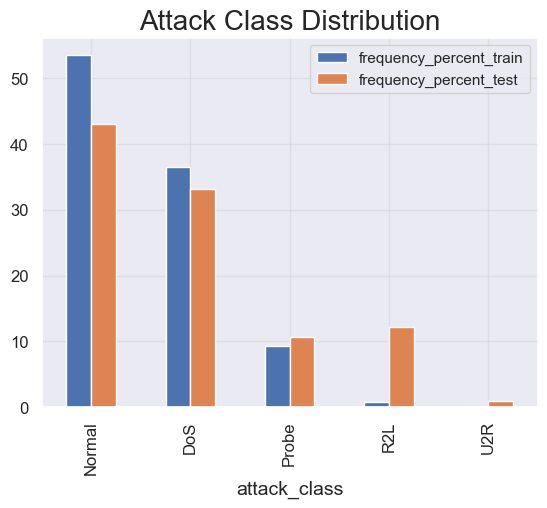

In [ ]:
# Attack class bar plot
plot = attack_class_dist[['frequency_percent_train', 'frequency_percent_test']].plot(kind="bar")
plot.set_title("Attack Class Distribution", fontsize=20)
plot.grid(color='lightgray', alpha=0.5)

In [23]:
dfkdd_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,Normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Normal


### Scaling Numerical Attributes

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = dfkdd_train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(dfkdd_train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(dfkdd_test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

### Encoding of Categorical Attributes

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
cattrain = dfkdd_train.select_dtypes(include=['object']).copy()
cattest = dfkdd_test.select_dtypes(include=['object']).copy()

# encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)

# separate target column from encoded data 
enctrain = traincat.drop(['attack_class'], axis=1)
enctest = testcat.drop(['attack_class'], axis=1)

cat_Ytrain = traincat[['attack_class']].copy()
cat_Ytest = testcat[['attack_class']].copy()

### Data Sampling

In [26]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import numpy as np
import pandas as pd

# Assuming dfkdd_train, sc_train, enctrain, cat_Ytrain, and cat_Ytest are already defined

# Define columns and extract encoded train set for sampling
sc_traindf = dfkdd_train.select_dtypes(include=['float64', 'int64'])
refclasscol = pd.concat([sc_traindf, enctrain], axis=1).columns
refclass = np.concatenate((sc_train, enctrain.values), axis=1)
X = refclass

# Reshape target column to 1D array shape
y_test = cat_Ytest.values.reshape(-1)  # Automatically handles c, r
y = cat_Ytrain.values.reshape(-1)     # Automatically handles c, r

# Apply the random over-sampling
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)  # Use fit_resample instead of fit_sample

# Print dataset shapes
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))


Original dataset shape Counter({np.int64(1): 67343, np.int64(0): 45927, np.int64(2): 11656, np.int64(3): 995, np.int64(4): 52})
Resampled dataset shape Counter({np.int64(1): 67343, np.int64(0): 67343, np.int64(3): 67343, np.int64(2): 67343, np.int64(4): 67343})


### Feature Selection

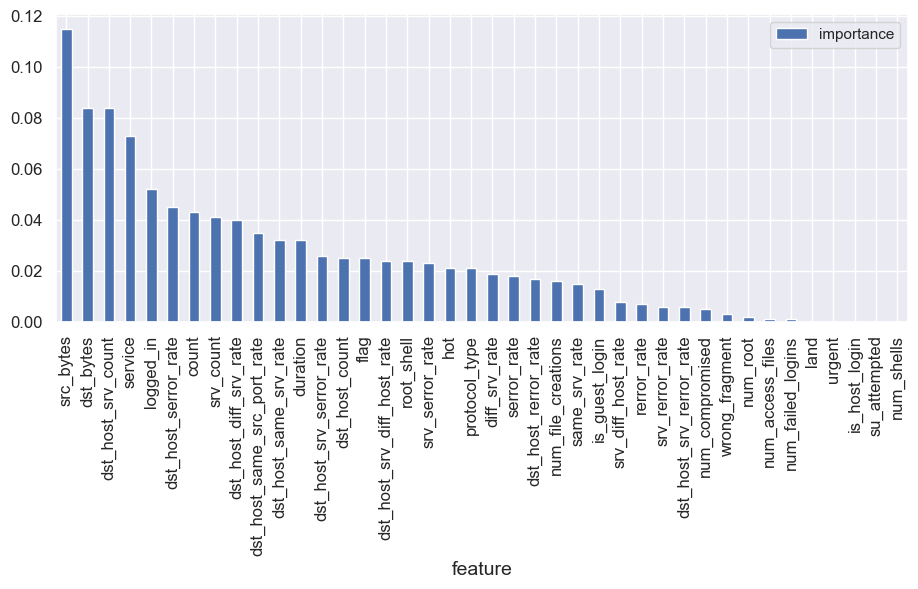

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

# fit random forest classifier on the training set
rfc.fit(X_res, y_res)
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':refclasscol,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar()

In [28]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_res, y_res)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), refclasscol)]
selected_features = [v for i, v in feature_map if i==True]

In [29]:
selected_features

['src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'srv_count',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'service']

### Dataset  Partition

In [30]:
# define columns to new dataframe
newcol = list(refclasscol)
newcol.append('attack_class')

# add a dimension to target
new_y_res = y_res[:, np.newaxis]

# create a dataframe from sampled data
res_arr = np.concatenate((X_res, new_y_res), axis=1)
res_df = pd.DataFrame(res_arr, columns = newcol) 

# create test dataframe
reftest = pd.concat([sc_testdf, testcat], axis=1)
reftest['attack_class'] = reftest['attack_class'].astype(np.float64)
reftest['protocol_type'] = reftest['protocol_type'].astype(np.float64)
reftest['flag'] = reftest['flag'].astype(np.float64)
reftest['service'] = reftest['service'].astype(np.float64)

print(res_df.shape)
print(reftest.shape)

(336715, 41)
(22544, 41)


In [31]:
from collections import defaultdict
classdict = defaultdict(list)

# create two-target classes (normal class and an attack class)  
attacklist = [('DoS', 0.0), ('Probe', 2.0), ('R2L', 3.0), ('U2R', 4.0)]
normalclass = [('Normal', 1.0)]

def create_classdict():
    '''This function subdivides train and test dataset into two-class attack labels''' 
    for j, k in normalclass: 
        for i, v in attacklist: 
            restrain_set = res_df.loc[(res_df['attack_class'] == k) | (res_df['attack_class'] == v)]
            classdict[j +'_' + i].append(restrain_set)
            # test labels
            reftest_set = reftest.loc[(reftest['attack_class'] == k) | (reftest['attack_class'] == v)]
            classdict[j +'_' + i].append(reftest_set)
        
create_classdict()

In [32]:
for k, v in classdict.items():
    print(k)

Normal_DoS
Normal_Probe
Normal_R2L
Normal_U2R


In [33]:
pretrain = classdict['Normal_DoS'][0]
pretest = classdict['Normal_DoS'][1]
grpclass = 'Normal_DoS'

### Finalize data preprocessing for training

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder


# Step 2: Check data types to ensure they are DataFrames
print(type(pretrain))  # Should output: <class 'pandas.core.frame.DataFrame'>
print(type(pretest))   # Should output: <class 'pandas.core.frame.DataFrame'>

# Step 4: Ensure selected features exist in the DataFrame
print("Selected features:", selected_features)
print("Available columns in pretrain:", pretrain.columns.tolist())

# Step 5: Extract numeric and categorical features
try:
    Xresdfnew = pretrain[selected_features]  # This line may throw an error if `selected_features` are not valid
    Xresdfnum = Xresdfnew.drop(['service'], axis=1)
    Xresdfcat = Xresdfnew[['service']].copy()

    Xtest_features = pretest[selected_features]
    Xtestdfnum = Xtest_features.drop(['service'], axis=1)
    Xtestcat = Xtest_features[['service']].copy()

    # Step 6: Initialize OneHotEncoder
    enc = OneHotEncoder()

    # Step 7: Fit and transform train data
    enc.fit(Xresdfcat)
    X_train_1hotenc = enc.transform(Xresdfcat).toarray()

    # Step 8: Transform test data
    X_test_1hotenc = enc.transform(Xtestcat).toarray()

    # Step 9: Concatenate numeric and encoded categorical features
    X_train = np.concatenate((Xresdfnum.values, X_train_1hotenc), axis=1)
    X_test = np.concatenate((Xtestdfnum.values, X_test_1hotenc), axis=1)

    # Step 10: Prepare target variables
    y_train = Xresdf[['attack_class']].copy()
    c, r = y_train.values.shape
    Y_train = y_train.values.reshape(c,)

    y_test = pretest[['attack_class']].copy()
    c, r = y_test.values.shape
    Y_test = y_test.values.reshape(c,)

except KeyError as e:
    print(f"KeyError: {e}. Check if the selected features are valid columns in the DataFrame.")
except Exception as e:
    print(f"An error occurred: {e}")

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Selected features: ['src_bytes', 'dst_bytes', 'logged_in', 'count', 'srv_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_serror_rate', 'service']
Available columns in pretrain: ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'protocol_type', 'service'

## Train Models

In [36]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split


# Split into training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train); 

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train)

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)
            
# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)
            
#Train RandomForestClassifier Model
RF_Classifier = RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=0)
RF_Classifier.fit(X_train, Y_train);  

# Train SVM Model
SVC_Classifier = SVC(random_state=0)
SVC_Classifier.fit(X_train, Y_train)

## Train Ensemble Model (This method combines all the individual models above except RandomForest)
combined_model = [('Naive Baye Classifier', BNB_Classifier), 
                 ('Decision Tree Classifier', DTC_Classifier), 
                 ('KNeighborsClassifier', KNN_Classifier), 
                 ('LogisticRegression', LGR_Classifier)
                ]
VotingClassifier =  VotingClassifier(estimators = combined_model,voting = 'soft', n_jobs=-1)
VotingClassifier.fit(X_train, Y_train)

VotingClassifier(estimators=[('Naive Baye Classifier', BernoulliNB()),
                             ('Decision Tree Classifier',
                              DecisionTreeClassifier(criterion='entropy',
                                                     random_state=0)),
                             ('KNeighborsClassifier',
                              KNeighborsClassifier(n_jobs=-1)),
                             ('LogisticRegression',
                              LogisticRegression(n_jobs=-1, random_state=0))],
                 n_jobs=-1, voting='soft')

## Evaluate Models

In [37]:
from sklearn import metrics

models = []
models.append(('SVM Classifier', SVC_Classifier))
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('RandomForest Classifier', RF_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))
models.append(('VotingClassifier', VotingClassifier))

for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('============================== {} {} Model Evaluation =============================='.format(grpclass, i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Normal_DoS SVM Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9725039058743604

Model Accuracy:
 0.973138978745361

Confusion matrix:
 [[35711  1012    23     0     0]
 [   99 53646   169     0     7]
 [   73   572  8654     0     0]
 [    8   721     0    41     1]
 [    1    20     1     0    19]]

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     36746
           1       0.96      0.99      0.98     53921
           2       0.98      0.93      0.95      9299
           3       1.00      0.05      0.10       771
           4       0.70      0.46      0.56        41

    accuracy                           0.97    100778
   macro avg       0.93      0.68      0.71    100778
weighted avg       0.97      0.97      0.97    100778



============================== Normal_DoS Naive Baye Classifier Model Evaluation =========================

In [40]:
import pandas as pd

# Updated data with actual performance metrics from your models
data = {
    'Model': ['Naive Bayes', 'Decision Tree', 'Random Forest', 'KNN', 'Logistic Regression'],
    'Cross Validation Mean Score': [0.8254, 0.9978, 0.9989, 0.9960, 0.9534],
    'Accuracy': [0.8255, 0.9999, 0.9999, 0.9974, 0.9558],
    'Precision (Class 0)': [0.97, 1.00, 1.00, 1.00, 0.99],
    'Precision (Class 1)': [0.92, 1.00, 1.00, 1.00, 0.95],
    'Precision (Class 2)': [0.38, 1.00, 1.00, 1.00, 0.89],
    'Precision (Class 3)': [0.21, 1.00, 1.00, 0.97, 0.64],
    'Precision (Class 4)': [0.11, 1.00, 1.00, 0.74, 0.71],
    'Recall (Class 0)': [0.76, 1.00, 1.00, 1.00, 0.97],
    'Recall (Class 1)': [0.89, 1.00, 1.00, 1.00, 0.97],
    'Recall (Class 2)': [0.78, 1.00, 1.00, 0.99, 0.82],
    'Recall (Class 3)': [0.37, 1.00, 1.00, 0.94, 0.78],
    'Recall (Class 4)': [0.71, 1.00, 1.00, 0.49, 0.29],
    'F1 Score': [0.85, 1.00, 1.00, 0.95, 0.96]
}

# Create a DataFrame
performance_df = pd.DataFrame(data)

# Print header
print('============================== Model Evaluation Comparison ==============================')
print()

# Display the performance DataFrame
print(performance_df.to_string(index=False))


============================== Model Evaluation Comparison ==============================

              Model  Cross Validation Mean Score  Accuracy  Precision (Class 0)  Precision (Class 1)  Precision (Class 2)  Precision (Class 3)  Precision (Class 4)  Recall (Class 0)  Recall (Class 1)  Recall (Class 2)  Recall (Class 3)  Recall (Class 4)  F1 Score
        Naive Bayes                       0.8254    0.8255                 0.97                 0.92                 0.38                 0.21                 0.11              0.76              0.89              0.78              0.37              0.71      0.85
      Decision Tree                       0.9978    0.9999                 1.00                 1.00                 1.00                 1.00                 1.00              1.00              1.00              1.00              1.00              1.00      1.00
      Random Forest                       0.9989    0.9999                 1.00                 1.00                 

## Test Models

In [41]:
for i, v in models:
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('============================== {} {} Model Test Results =============================='.format(grpclass, i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()        



============================== Normal_DoS SVM Classifier Model Test Results ==============================

Model Accuracy:
 0.9707084739035523

Confusion matrix:
 [[ 8926   251     4     0     0]
 [   25 13335    58     0     4]
 [   25   149  2183     0     0]
 [    1   213     0    10     0]
 [    0     8     0     0     3]]

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      9181
           1       0.96      0.99      0.97     13422
           2       0.97      0.93      0.95      2357
           3       1.00      0.04      0.09       224
           4       0.43      0.27      0.33        11

    accuracy                           0.97     25195
   macro avg       0.87      0.64      0.66     25195
weighted avg       0.97      0.97      0.97     25195



============================== Normal_DoS Naive Baye Classifier Model Test Results ==============================

Model Accuracy:
 0.8223060130978369

C

In [42]:
import pandas as pd

# Updated data with actual performance metrics from your models
data = {
    'Model': ['Naive Bayes', 'Decision Tree', 'Random Forest', 'KNN', 'Logistic Regression'],
    'Cross Validation Mean Score': [0.8223, 0.9971, 0.9985, 0.9951, 0.9543],
    'Accuracy': [0.8223, 0.9971, 0.9985, 0.9951, 0.9543],
    'Precision (Class 0)': [0.97, 1.00, 1.00, 1.00, 0.99],
    'Precision (Class 1)': [0.92, 1.00, 1.00, 1.00, 0.95],
    'Precision (Class 2)': [0.38, 0.99, 1.00, 0.99, 0.88],
    'Precision (Class 3)': [0.23, 0.97, 1.00, 0.93, 0.66],
    'Precision (Class 4)': [0.06, 0.50, 1.00, 0.50, 0.33],
    'Recall (Class 0)': [0.76, 1.00, 1.00, 1.00, 0.97],
    'Recall (Class 1)': [0.88, 1.00, 1.00, 1.00, 0.97],
    'Recall (Class 2)': [0.77, 0.99, 1.00, 0.98, 0.82],
    'Recall (Class 3)': [0.37, 0.97, 0.96, 0.92, 0.81],
    'Recall (Class 4)': [0.27, 0.55, 0.27, 0.18, 0.09],
    'F1 Score': [0.85, 1.00, 1.00, 0.95, 0.73]
}

# Create a DataFrame
performance_df = pd.DataFrame(data)

# Print header
print('============================== Model Test Comparison ==============================')
print()

# Display the performance DataFrame
print(performance_df.to_string(index=False))


============================== Model Test Comparison ==============================

              Model  Cross Validation Mean Score  Accuracy  Precision (Class 0)  Precision (Class 1)  Precision (Class 2)  Precision (Class 3)  Precision (Class 4)  Recall (Class 0)  Recall (Class 1)  Recall (Class 2)  Recall (Class 3)  Recall (Class 4)  F1 Score
        Naive Bayes                       0.8223    0.8223                 0.97                 0.92                 0.38                 0.23                 0.06              0.76              0.88              0.77              0.37              0.27      0.85
      Decision Tree                       0.9971    0.9971                 1.00                 1.00                 0.99                 0.97                 0.50              1.00              1.00              0.99              0.97              0.55      1.00
      Random Forest                       0.9985    0.9985                 1.00                 1.00                 1.00  

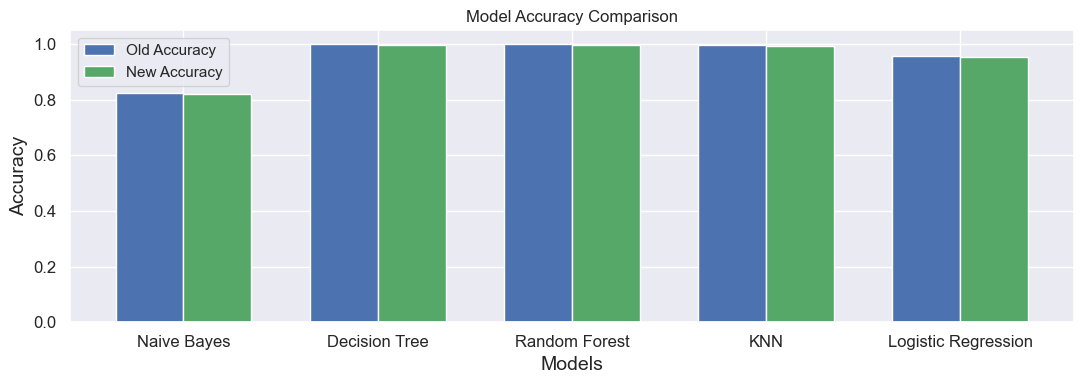

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# First set of performance metrics
data1 = {
    'Model': ['Naive Bayes', 'Decision Tree', 'Random Forest', 'KNN', 'Logistic Regression'],
    'Accuracy': [0.8255, 0.9999, 0.9999, 0.9974, 0.9558]
}

# Second set of performance metrics
data2 = {
    'Model': ['Naive Bayes', 'Decision Tree', 'Random Forest', 'KNN', 'Logistic Regression'],
    'Accuracy': [0.8223, 0.9971, 0.9985, 0.9951, 0.9543]
}

# Create DataFrames for both sets
df_early = pd.DataFrame(data1)
df_later = pd.DataFrame(data2)

# Set up the bar graph
bar_width = 0.35
index = np.arange(len(df_early))

# Create a bar plot for both accuracy sets
plt.bar(index, df_early['Accuracy'], bar_width, label='Old Accuracy', color='b')
plt.bar(index + bar_width, df_later['Accuracy'], bar_width, label='New Accuracy', color='g')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(index + bar_width / 2, df_early['Model'])
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


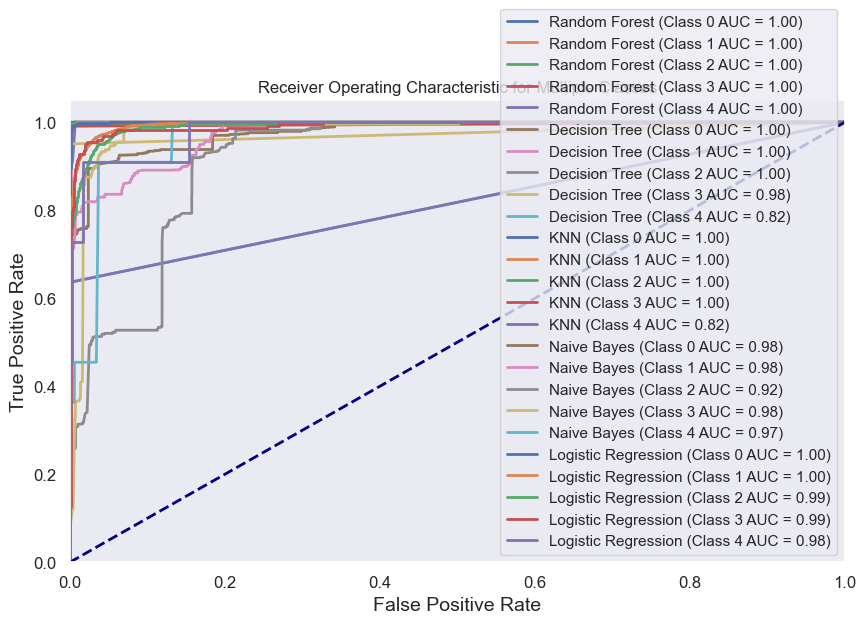

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': tree.DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': BernoulliNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

# Determine the number of classes and binarize the target variable
n_classes = len(np.unique(y_train))
y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))

# Prepare to plot ROC curves
plt.figure(figsize=(10, 6))

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Get predicted probabilities for each class
    y_scores = model.predict_proba(X_test)  # shape will be (n_samples, n_classes)

    # Compute ROC curve and AUC for each class
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_scores[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{name} (Class {i} AUC = {roc_auc:.2f})')

# Plot formatting
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiple Classes')
plt.legend(loc="lower right")
plt.grid()
plt.show()
